In [116]:
"""
Name : Anish Joshi
Reg. No- 21BCE1649
VIT Branch: VIT Chennai
CSE CORE

"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
df= pd.read_csv('/content/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### DATA PREPROCESSING

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

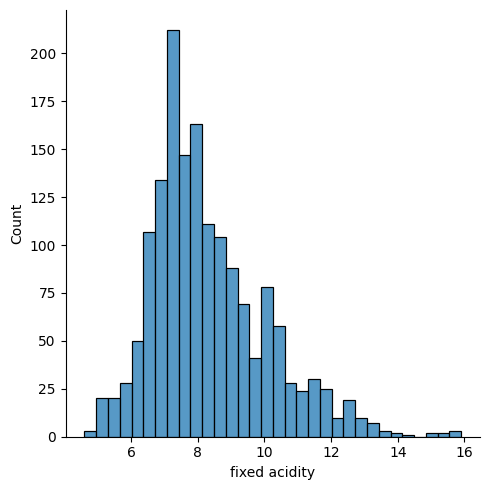

In [ ]:
sns.displot(df['fixed acidity'])

In [ ]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

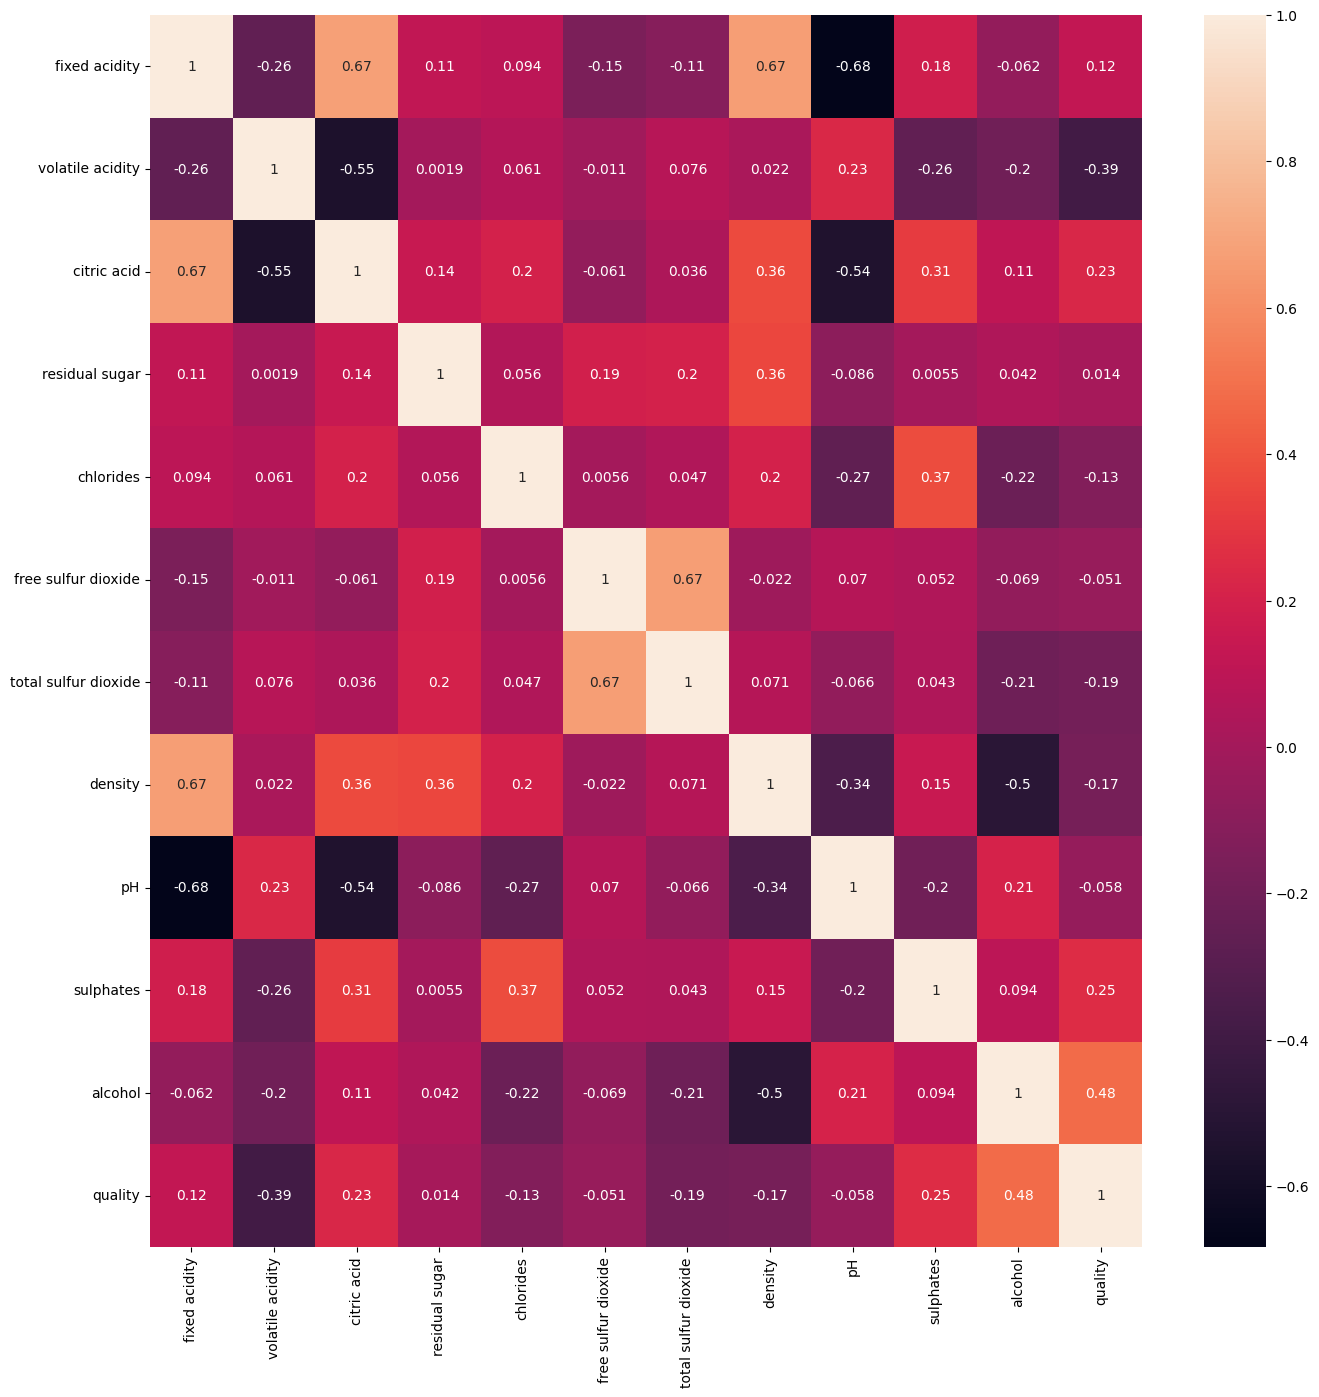

In [55]:
sns.heatmap(df.corr(),annot=True)

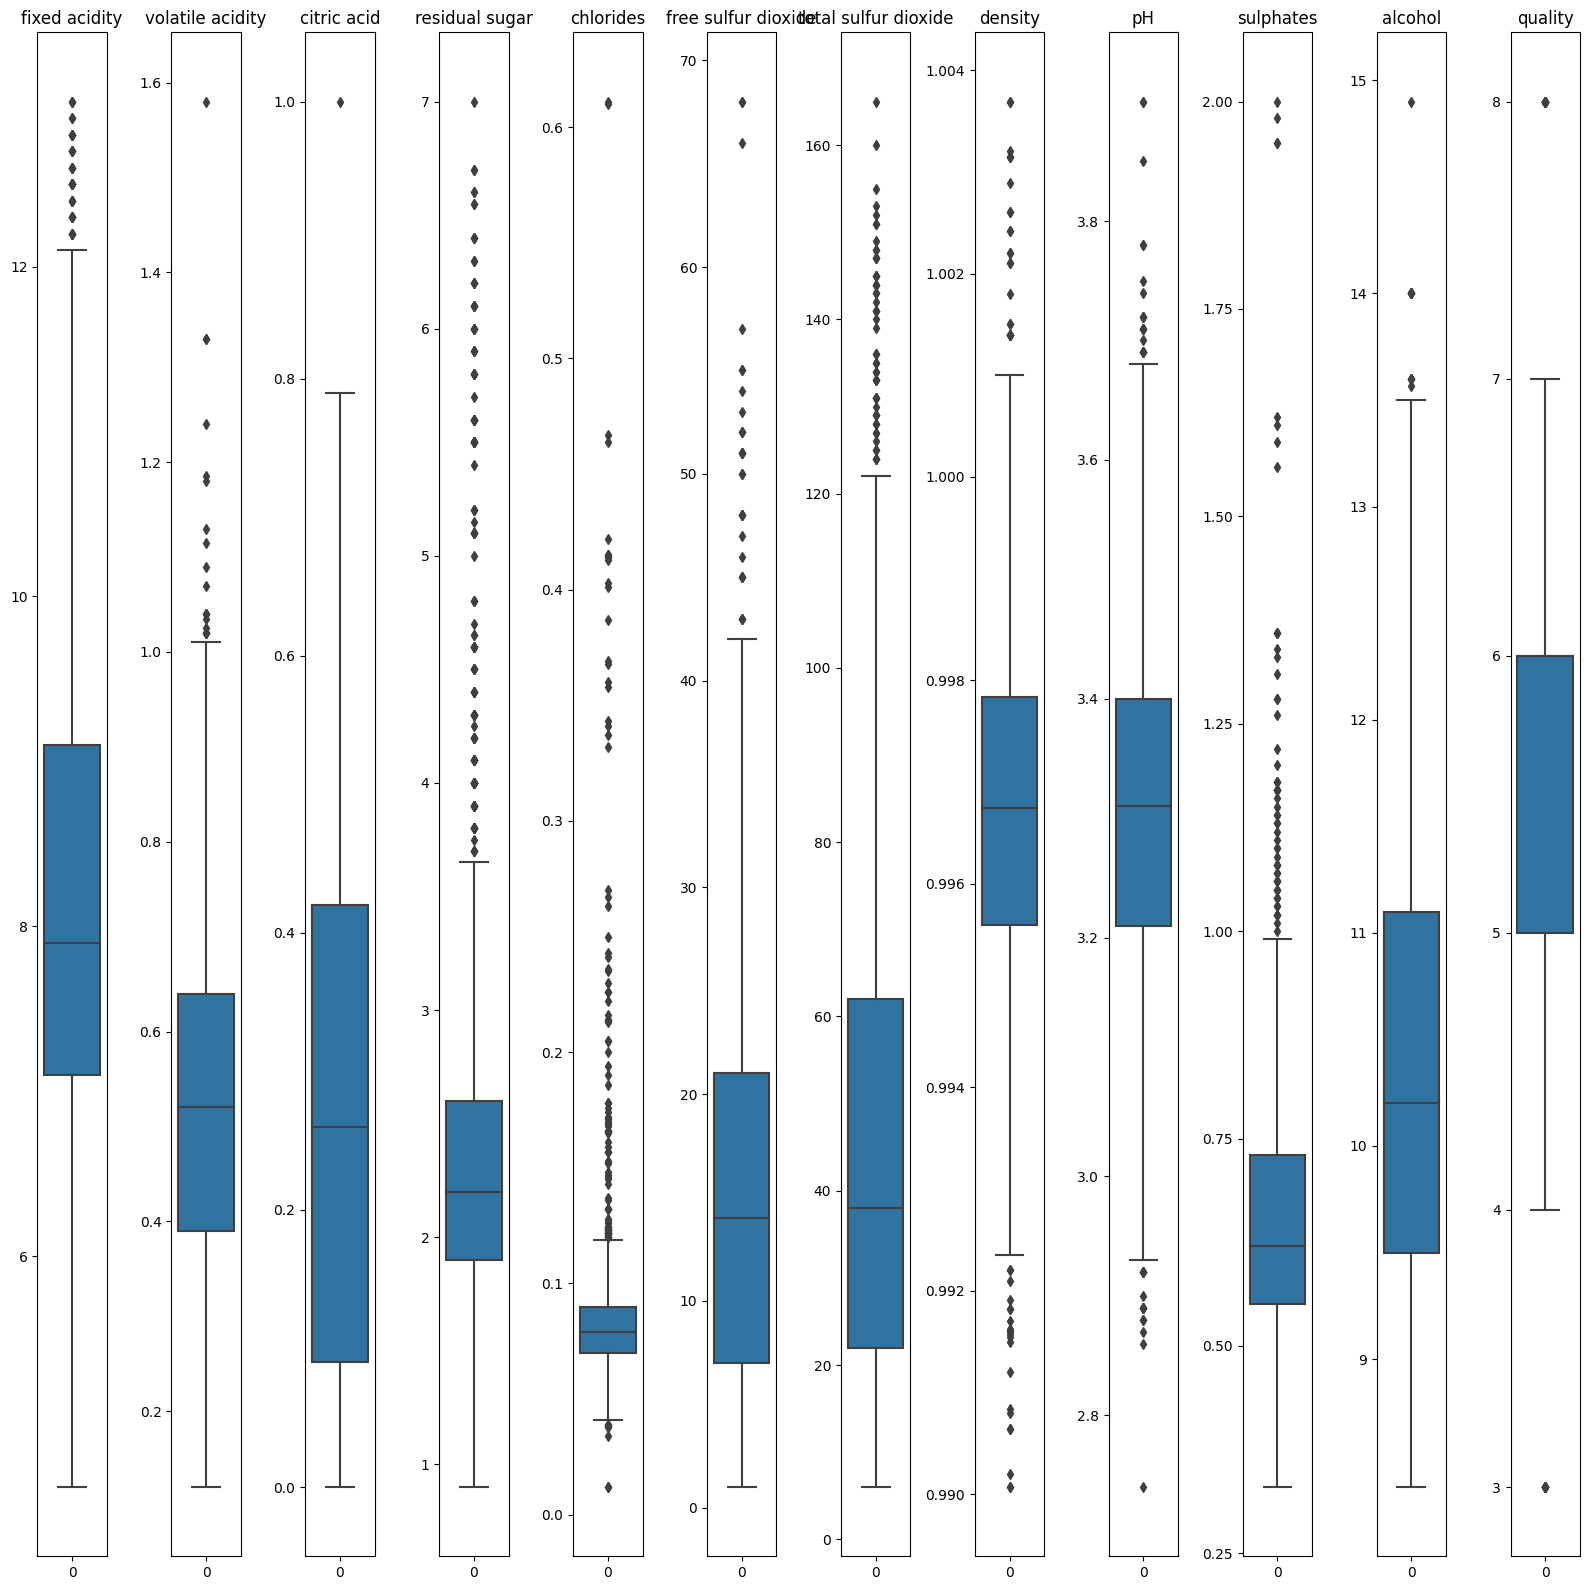

In [74]:
# Store the list of columns
rcParams['figure.figsize'] = 16,16
columns_to_plot = df.columns

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis)
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Removing very extreme outliers

In [73]:
df['pH'] = np.where(df['pH']>4,df['pH'].median(),df['pH'])

### MODEL BUILDING


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
# Splitting data into x and y

x = df.drop(['quality'],axis=1)
y= df['quality']

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)

In [80]:
x_train.shape,x_test.shape

((1279, 11), (320, 11))

In [104]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()

In [105]:
model1.fit(x_train,y_train)

RandomForestClassifier()

In [106]:
y_pred= model1.predict(x_test)

In [107]:
y_pred_train= model1.predict(x_train)

### Evaluation metrics


In [108]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [109]:
print('Testing accuracy=',accuracy_score(y_test,y_pred))
print('Training accuracy=',accuracy_score(y_train,y_pred_train))

Testing accuracy= 0.7125
Training accuracy= 1.0


In [110]:
pd.crosstab(y_test,y_pred)

col_0,5,6,7,8
quality,,,,
3,1,1,0,0
4,8,3,0,0
5,108,26,1,0
6,27,105,10,0
7,1,9,15,2
8,0,0,3,0


In [111]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.80      0.77       135
           6       0.73      0.74      0.73       142
           7       0.52      0.56      0.54        27
           8       0.00      0.00      0.00         3

    accuracy                           0.71       320
   macro avg       0.33      0.35      0.34       320
weighted avg       0.68      0.71      0.70       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Test with random observation

In [113]:
model1.predict([[7.8	, 0.88, 0.00 , 2.6 , 0.098,25.0,67.0,0.9968,3.20,0.68,9.8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5])

In [114]:
model1.predict([[11.2	, 0.28	, 0.56 , 1.9 , 0.075,17.0,60.0,0.9980,3.16,0.58,9.8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([6])